In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from tqdm.auto import tqdm
import pandas as pd
import h5py
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import folium
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras.optimizers import Adam, SGD
from matplotlib import pyplot as plt

import os
from tensorflow.python.platform import gfile
from tensorflow.python.lib.io import file_io
from io import BytesIO

In [0]:

# Google Cloud Storage Bucket
GCS_BUCKET = '216-geospatial_analytics'
GCS_folder = 'summer_retry'

filelist = gfile.ListDirectory("gs://"+GCS_BUCKET+'/'+GCS_folder)

train_files_dir = 'gs://' + GCS_BUCKET + '/' + GCS_folder  #file_extension



In [0]:
def pad_images(x):
  padded_x = np.zeros((512,512,3), dtype=np.uint8)
  x0 = x

  if x0.shape[0] != 512:
    pad_left = (512 - x0.shape[0])//2
    pad_right = x0.shape[0]+pad_left
    padded_x[pad_left:pad_right, :x0.shape[1],:] = x0

  if x0.shape[1] != 512:
    pad_top = (512 - x0.shape[1])//2
    pad_bottom = x0.shape[1]+pad_top
    padded_x[:x0.shape[0], pad_top:pad_bottom,:] = x0
  return np.array(padded_x)

loading images...


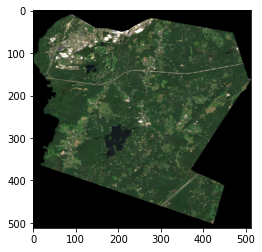

In [0]:
import imageio

from tqdm.auto import tqdm
import matplotlib.pyplot as plt
save_files_dir = 'gs://' + GCS_BUCKET + '/summer_resized/'  #file_extension

pic_list = []
labels = []
print("loading images...")
for i, filename in enumerate(tqdm(filelist)):
  image = np.array(tf.image.decode_png(tf.io.read_file(os.path.join(train_files_dir, filename))), dtype=np.uint8)
  image = image
  image = pad_images(image[:,:,:3])
  image = image.astype(np.uint8)
  plt.imshow(image)
  im = Image.fromarray(image)
  im.save('/content/drive/My Drive/summer_resized/'+filename)



1478


array(['25013812401.png', '25013812403.png', '25013812404.png', ...,
       '25013812201.png', '25013812202.png', '25013812300.png'],
      dtype='<U15')

In [0]:
# load in cenpy population data
!apt install libspatialindex-dev
!pip install cenpy
import cenpy

massachusetts = cenpy.products.Decennial2010().from_state('Massachusetts',  variables=['P001001'], level="tract")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (620 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_str

In [0]:
import pickle
areas = pickle.load( open( "/content/drive/My Drive/areas.p", "rb" ) )
areas

{'25025000100': 1.792054374513103,
 '25025000201': 0.5984140130796672,
 '25025000202': 0.6006729828670679,
 '25025000301': 0.5713859778472372,
 '25025000302': 0.6349676637380627,
 '25025000401': 0.43035062905494553,
 '25025000402': 0.8054712820975481,
 '25025000502': 1.1965068147083637,
 '25025000503': 0.13893257000247566,
 '25025000504': 0.3326539319903489,
 '25025000601': 0.4942483227069726,
 '25025000602': 0.5988134034825401,
 '25025000701': 0.2300653901442833,
 '25025000703': 0.17773489659193428,
 '25025000704': 0.23939873401781162,
 '25025000802': 0.9759061166227354,
 '25025000803': 1.156329070838165,
 '25001010100': 37.75602700776795,
 '25025010103': 0.27259337466530237,
 '25025010104': 0.2862750440649449,
 '25025010203': 0.3657067330750435,
 '25025010204': 0.2543027050138612,
 '25001010206': 69.98732689954433,
 '25001010208': 65.62803002697457,
 '25025010300': 0.5083939515655561,
 '25001010304': 26.136903933957996,
 '25001010306': 19.507819195912173,
 '25001010400': 24.038331166

In [0]:
import pathlib

data_dir = pathlib.Path('/content/drive/My Drive/summer_resized/')

# list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
image_count = len(list(data_dir.glob('*.png')))
print(image_count)
IMAGE_NAMES = np.array([item.name for item in data_dir.glob('*.png') if item.name != "LICENSE.txt"])
IMAGE_NAMES
POPULATION_VALS = []
for filename in tqdm(IMAGE_NAMES):
  state = filename[:2]
  county = filename[2:5]
  tract = filename[5:-4]
  pop = massachusetts[(massachusetts['state'] == state) & (massachusetts['county'] == county) & (massachusetts['tract'] == tract)].P001001.values[0]
  POPULATION_VALS.append((filename,pop))
pop_df = pd.DataFrame(POPULATION_VALS, columns =['filename', 'population']) 



1478


1478


array(['25013812401.png', '25013812403.png', '25013812404.png', ...,
       '25013812201.png', '25013812202.png', '25013812300.png'],
      dtype='<U15')

In [0]:
BATCH_SIZE = 16
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
image_dir = '/content/drive/My Drive/summer_resized'
save_files_dir = 'gs://' + GCS_BUCKET + '/summer_resized/'  #file_extension
print

NameError: ignored

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split=0.2) 

In [0]:
def combined_generator(subset, width, height, batchsize):
    img_gen = train_datagen.flow_from_dataframe(dataframe=pop_df, directory=image_dir, 
                                              x_col="filename", y_col="population", has_ext=True, 
                                              class_mode="other", target_size=(width, height), 
                                              batch_size=batchsize,subset=subset, shuffle=True)
    while True:
      idx = (img_gen.batch_index) * img_gen.batch_size
      filenames = img_gen.filenames[idx : idx + img_gen.batch_size]
      area_list = pop_df[pop_df['filename'].isin(filenames)].area.values
      X1 = next(img_gen)
      yield ([X1[0],area_list], X1[1])

In [0]:
train_generator = combined_generator(subset='training', width=IMG_WIDTH, height=IMG_HEIGHT, batchsize=BATCH_SIZE)
validation_generator = combined_generator(subset='validation', width=IMG_WIDTH, height=IMG_HEIGHT, batchsize=BATCH_SIZE)

0.861793427812445
pop 3214.0


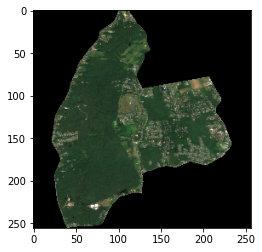

In [0]:
pop_df[pop_df.population == 3214.0]

,filename,population,area
1210,25005653204.png,3214.0,12.516089


In [0]:
areas['25005653204']

12.516088898698927

In [0]:
filenames = ['25017359100.png', '25017359300.png', '25017360100.png', '25017360200.png', '25017361100.png', '25017361200.png', '25017361300.png', '25017362100.png', '25017363102.png', '25017363103.png', '25017363104.png', '25017363201.png', '25017363202.png', '25017364101.png', '25017364102.png', '25017365100.png']
area_list = pop_df[pop_df['filename'].isin(filenames)].area.values

In [0]:
train_generator = train_datagen.flow_from_dataframe(dataframe=pop_df, directory=image_dir, 
                                              x_col="filename", y_col="population", has_ext=True, 
                                              class_mode="other", target_size=(IMG_WIDTH, IMG_HEIGHT), 
                                              batch_size=BATCH_SIZE,subset='training')

Found 1183 validated image filenames.


In [0]:
 validation_generator = train_datagen.flow_from_dataframe(dataframe=pop_df, directory=image_dir, 
                                              x_col="filename", y_col="population", has_ext=True, 
                                              class_mode="other", target_size=(IMG_WIDTH, IMG_HEIGHT), 
                                              batch_size=BATCH_SIZE,subset='validation')


Found 295 validated image filenames.


In [0]:
x,y = next(train_generator)

Found 1183 validated image filenames.


In [0]:
x,y = next(train_generator)

[x1,x2] = x
print(np.shape(x1))
print(np.shape(x2))

(16, 256, 256, 3)
(16,)


In [0]:
print(np.shape(y))
print(y[0])

(16,)
25025070600.png


In [0]:
pop_df[pop_df.population == 4979.0]

,filename,population
756,25025101002.png,4979.0


Now, I'll just create a standard, FFNN, with 3 dense layers with 512 units, a dropout layer, another dense layer, and a linear prediction layer

In [0]:
input1 = Input(shape=(256,256,3))
flat = Flatten()(input1)
dense1 = Dense(32)(flat)
dense2 = Dense(32)(dense1)

input2 = Input(shape=(1))
dense2_1 = Dense(32)(input2)

concat= Concatenate()([dense2_1, dense2])


dropout = Dropout(0.2)(concat)
dense3 = Dense(32)(dropout)
output = Dense(1, activation='linear')(dense3)
model = Model(inputs=[input1, input2], outputs=output)



model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_35 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
flatten_22 (Flatten)            (None, 196608)       0           input_35[0][0]                   
__________________________________________________________________________________________________
input_36 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_95 (Dense)                (None, 32)           6291488     flatten_22[0][0]                 
___________________________________________________________________________________________

In [0]:
STEP_SIZE_TRAIN=1183//16
STEP_SIZE_VALID=295//16
model.compile(loss='mean_squared_error', optimizer='adam')
# fit
model_history = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs = 10)
# model_history = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN,validation_data = validation_generator, validation_steps=STEP_SIZE_VALID, epochs = 10)

Epoch 1/10
73/73 [==============================] - 10s 142ms/step - loss: 5192447.5000
Epoch 2/10
73/73 [==============================] - 11s 144ms/step - loss: 4949899.5000
Epoch 3/10
73/73 [==============================] - 10s 143ms/step - loss: 3891290.7500
Epoch 4/10
73/73 [==============================] - 10s 142ms/step - loss: 3169235.7500
Epoch 5/10
73/73 [==============================] - 11s 144ms/step - loss: 2995689.0000
Epoch 6/10
73/73 [==============================] - 10s 143ms/step - loss: 2715427.2500
Epoch 7/10
73/73 [==============================] - 10s 142ms/step - loss: 2406181.2500
Epoch 8/10
73/73 [==============================] - 10s 144ms/step - loss: 2284789.0000
Epoch 9/10
73/73 [==============================] - 11s 144ms/step - loss: 1974652.8750
Epoch 10/10
73/73 [==============================] - 10s 143ms/step - loss: 1910975.7500


In [0]:
model = Sequential()
model.add(Input(shape=(256,256,3)))
model.add(Conv2D(64,(3,3), padding="same", activation='relu'))
model.add(Conv2D(64,(3,3), padding="same", activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Conv2D(128,(3,3), padding="same", activation='relu'))
model.add(Conv2D(128,(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Conv2D(256,(3,3), padding="same", activation='relu'))
model.add(Conv2D(256,(3,3),padding="same", activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(128,(3,3), padding="same", activation='relu'))
model.add(Conv2D(128,(3,3),padding="same", activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3), padding="same", activation='relu'))
model.add(Conv2D(64,(3,3),padding="same", activation='relu'))
model.add(Conv2D(1,(1,1),padding="same", activation='linear'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       2

3949.0


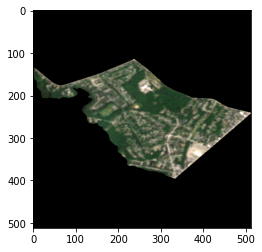

In [0]:
x,y  = train_generator.next()
plt.imshow(x[0,:,:,:])
print(y[0])

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
model.compile(loss='mean_squared_error', optimizer='adam')
# fit


Epoch 1/10
73/73 [==============================] - 465s 6s/step - loss: 22847804.0000 - val_loss: 11568565.0000
Epoch 2/10
73/73 [==============================] - 19s 262ms/step - loss: 3402228.2500 - val_loss: 3115043.0000
Epoch 3/10
73/73 [==============================] - 19s 261ms/step - loss: 2840565.5000 - val_loss: 2837601.7500
Epoch 4/10
73/73 [==============================] - 19s 261ms/step - loss: 2753106.7500 - val_loss: 3743878.2500
Epoch 5/10
73/73 [==============================] - 19s 262ms/step - loss: 3035501.7500 - val_loss: 2837077.5000
Epoch 6/10
73/73 [==============================] - 19s 262ms/step - loss: 2981003.5000 - val_loss: 3365535.5000
Epoch 7/10
73/73 [==============================] - 19s 261ms/step - loss: 2506846.0000 - val_loss: 2549996.5000
Epoch 8/10
73/73 [==============================] - 19s 264ms/step - loss: 2479997.0000 - val_loss: 3605045.0000
Epoch 9/10
73/73 [==============================] - 19s 261ms/step - loss: 2612864.0000 - val_lo

In [0]:
model_history = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN,validation_data = validation_generator, validation_steps=STEP_SIZE_VALID, epochs = 100)
model.save_weights('/content/drive/My Drive/AM216/geospatial_analysis/cnn.h5')


Epoch 1/100
73/73 [==============================] - 19s 263ms/step - loss: 2043352.1250 - val_loss: 2495472.2500
Epoch 2/100
73/73 [==============================] - 19s 262ms/step - loss: 1925028.7500 - val_loss: 2569829.0000
Epoch 3/100
73/73 [==============================] - 19s 262ms/step - loss: 1976909.0000 - val_loss: 2350670.7500
Epoch 4/100
73/73 [==============================] - 19s 262ms/step - loss: 1875339.2500 - val_loss: 2324286.0000
Epoch 5/100
73/73 [==============================] - 19s 265ms/step - loss: 2042178.0000 - val_loss: 2563748.7500
Epoch 6/100
73/73 [==============================] - 19s 262ms/step - loss: 1871622.3750 - val_loss: 2297445.2500
Epoch 7/100
73/73 [==============================] - 19s 261ms/step - loss: 1805916.6250 - val_loss: 2971438.0000
Epoch 8/100
73/73 [==============================] - 19s 262ms/step - loss: 1648830.6250 - val_loss: 2664743.2500
Epoch 9/100
73/73 [==============================] - 19s 262ms/step - loss: 1785138.6250

KeyboardInterrupt: ignored

Deep Sequential CNN

In [0]:
model = Sequential()
model.add(Input(shape=(512,512,3)))
model.add(Conv2D(64,(3,3), padding="same", activation='relu'))
model.add(Conv2D(64,(3,3), padding="same", activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))
# model.add(Conv2D(128,(3,3), padding="same", activation='relu'))
# model.add(Conv2D(128,(3,3),padding="same", activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))
# model.add(Conv2D(256,(3,3), padding="same", activation='relu'))
# model.add(Conv2D(256,(3,3),padding="same", activation='relu'))

# model.add(UpSampling2D((2,2)))
# model.add(Conv2D(128,(3,3), padding="same", activation='relu'))
# model.add(Conv2D(128,(3,3),padding="same", activation='relu'))
# model.add(UpSampling2D((2,2)))
# model.add(Conv2D(64,(3,3), padding="same", activation='relu'))
# model.add(Conv2D(64,(3,3),padding="same", activation='relu'))
model.add(Conv2D(1,(1,1),padding="same", activation='linear'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 64)      2368      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 1)       65        
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dropout (Dropout)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 262145    
Total params: 301,506
Trainable params: 301,506
Non-trainable params: 0
__________________________________________________

Deep Unet Model

In [0]:
input_feat = Input(shape=(256,256,3))
conv_layer1 = Conv2D(64,(3,3), padding="same", activation='relu')(input_feat)
conv_layer2 = Conv2D(64,(3,3), padding="same", activation='relu')(conv_layer1)
max_pool1 = MaxPooling2D((2,2), strides=(2,2))(conv_layer1)
conv_layer3 = Conv2D(128,(3,3), padding="same", activation='relu')(max_pool1)
conv_layer4 = Conv2D(128,(3,3), padding="same", activation='relu')(conv_layer3)
max_pool2 = MaxPooling2D((2,2), strides=(2,2))(conv_layer4)
conv_layer5 = Conv2D(256,(3,3), padding="same", activation='relu')(max_pool2)
conv_layer6 = Conv2D(256,(3,3),padding="same", activation='relu')(conv_layer5)

# upsampling and concatenating
upsample1 = UpSampling2D((2,2))(conv_layer6)
concat1 = Concatenate()([upsample1, conv_layer4])
conv_layer7 = Conv2D(128,(3,3), padding="same", activation='relu')(concat1)
conv_layer8 = Conv2D(128,(3,3),padding="same", activation='relu')(conv_layer7)
upsample2 = UpSampling2D((2,2))(conv_layer8)
concat2 = Concatenate()([upsample2, conv_layer2])
conv_layer9 = Conv2D(64,(3,3), padding="same", activation='relu')(concat2)
conv_layer10 = Conv2D(64,(3,3),padding="same", activation='relu')(conv_layer9)
output = Conv2D(1,(1,1),padding="same", activation='linear')(conv_layer10)

# build model
unet_model = tf.keras.Model(input_feat, output)
unet_model.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_112 (Conv2D)             (None, 256, 256, 64) 1792        input_45[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_20 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_112[0][0]                 
__________________________________________________________________________________________________
conv2d_114 (Conv2D)             (None, 128, 128, 128 73856       max_pooling2d_20[0][0]           
___________________________________________________________________________________________